In [13]:
#!pip install pillow


In [14]:
from PIL import Image, ImageOps
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [15]:
"""from PIL import Image
import os
import numpy as np
# Path to the source folder and the new folder
input_folder = '../data/train_features'
output_folder = '../data/processed_images'
# Create the new folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
# Define the range of white color
def is_white_color(color, threshold=230):
    # Check if color is close to white within the given threshold
    return all(c >= threshold for c in color)
height_to_check = 8
check_width = 10
start_from = 50
threshold = 230  # Adjust this threshold based on what is considered "close to white"
# Iterate through each image in the source folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(input_folder, filename)
        with Image.open(file_path) as img:
            width, height = img.size
            # Define the region to check for white color
            box = (start_from, height - height_to_check, start_from + check_width, height)
            region = img.crop(box)
            # Convert the region to a NumPy array for easy processing
            region_np = np.array(region)
            # Check if all pixels in the region are close to white
            white_pixels = np.apply_along_axis(is_white_color, 1, region_np)
            if np.all(white_pixels):
                # Save the original image to the new folder
                original_file_path = os.path.join(output_folder, filename)
                img.save(original_file_path)
                # Crop the bottom 16 pixels
                cropped_img = img.crop((0, 0, width, height - height_to_check - 8))
                # Create new filename with '_cropped' suffix
                name, ext = os.path.splitext(filename)
                new_filename = f"{name}_cropped{ext}"
                new_file_path = os.path.join(output_folder, new_filename)
                # Save the cropped image to the new folder
                cropped_img.save(new_file_path)
print("Processing complete.")"""

'from PIL import Image\nimport os\nimport numpy as np\n# Path to the source folder and the new folder\ninput_folder = \'../data/train_features\'\noutput_folder = \'../data/processed_images\'\n# Create the new folder if it does not exist\nif not os.path.exists(output_folder):\n    os.makedirs(output_folder)\n# Define the range of white color\ndef is_white_color(color, threshold=230):\n    # Check if color is close to white within the given threshold\n    return all(c >= threshold for c in color)\nheight_to_check = 8\ncheck_width = 10\nstart_from = 50\nthreshold = 230  # Adjust this threshold based on what is considered "close to white"\n# Iterate through each image in the source folder\nfor filename in os.listdir(input_folder):\n    if filename.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\')):\n        file_path = os.path.join(input_folder, filename)\n        with Image.open(file_path) as img:\n            width, height = img.size\n            # Define the region to check for white col

In [16]:
"""# Define the range of white color
def is_white_color(color, threshold=230):
    # Check if color is close to white within the given threshold
    return all(c >= threshold for c in color)

def crop_white_bottom(input_folder,output_folder):
    # Create the new folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    counter = 0
    height_to_check = 8
    check_width = 10
    start_from = 60
    threshold = 230  # Adjust this threshold based on what is considered "close to white"
    # Iterate through each image in the source folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(input_folder, filename)
            with Image.open(file_path) as img:
                width, height = img.size
                # Define the region to check for white color
                box = (start_from, height - height_to_check, start_from + check_width, height)
                region = img.crop(box)
                # Convert the region to a NumPy array for easy processing
                region_np = np.array(region)
                # Check if all pixels in the region are close to white
                white_pixels = np.apply_along_axis(is_white_color, 1, region_np)
                
                if np.all(white_pixels):
                    # Crop the bottom 16 pixels
                    img = img.crop((0, 0, width, height - height_to_check - 8))
                    counter +=1

                # Save the original image to the new folder
                new_file_path = os.path.join(output_folder, filename)
                img.save(new_file_path)
    print(output_folder, "Processing complete. Total:", counter)"""

'# Define the range of white color\ndef is_white_color(color, threshold=230):\n    # Check if color is close to white within the given threshold\n    return all(c >= threshold for c in color)\n\ndef crop_white_bottom(input_folder,output_folder):\n    # Create the new folder if it does not exist\n    if not os.path.exists(output_folder):\n        os.makedirs(output_folder)\n    counter = 0\n    height_to_check = 8\n    check_width = 10\n    start_from = 60\n    threshold = 230  # Adjust this threshold based on what is considered "close to white"\n    # Iterate through each image in the source folder\n    for filename in os.listdir(input_folder):\n        if filename.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\')):\n            file_path = os.path.join(input_folder, filename)\n            with Image.open(file_path) as img:\n                width, height = img.size\n                # Define the region to check for white color\n                box = (start_from, height - height_to_check,

In [17]:
"""# Path to the train folder and the new train folder
input_train_folder = '../data/train_features'
output_train_folder = '../data/new_train_features'

# Path to the test folder and the new test folder
input_test_folder = '../data/test_features'
output_test_folder = '../data/new_test_features'

crop_white_bottom(input_train_folder,output_train_folder)
crop_white_bottom(input_test_folder,output_test_folder)"""

"# Path to the train folder and the new train folder\ninput_train_folder = '../data/train_features'\noutput_train_folder = '../data/new_train_features'\n\n# Path to the test folder and the new test folder\ninput_test_folder = '../data/test_features'\noutput_test_folder = '../data/new_test_features'\n\ncrop_white_bottom(input_train_folder,output_train_folder)\ncrop_white_bottom(input_test_folder,output_test_folder)"

In [18]:
"""from PIL import Image, ImageOps
import os
# Path to the source folder and the new folder
input_folder = 'data/train_features'
output_folder = 'data/resized_images'
# Create the new folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
# Step 1: Determine the maximum width and height
max_width = 0
max_height = 0
# First, iterate through all images to find the maximum dimensions
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(input_folder, filename)
        with Image.open(file_path) as img:
            width, height = img.size
            if width > max_width:
                max_width = width
            if height > max_height:
                max_height = height
                
print(f"Maximum dimensions found: {max_width}x{max_height}")
# Step 2: Resize and pad all images to match the maximum dimensions
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(input_folder, filename)
        with Image.open(file_path) as img:
            # Calculate padding required to center the image
            delta_width = max_width - img.width
            delta_height = max_height - img.height
            padding = (delta_width // 2, delta_height // 2, delta_width - (delta_width // 2), delta_height - (delta_height // 2))
            # Add padding and create a new image with the desired size
            padded_img = ImageOps.expand(img, padding, fill=0)
            # Save the new image to the output folder
            new_file_path = os.path.join(output_folder, filename)
            padded_img.save(new_file_path)
print("Resizing and padding complete.")"""



'from PIL import Image, ImageOps\nimport os\n# Path to the source folder and the new folder\ninput_folder = \'data/train_features\'\noutput_folder = \'data/resized_images\'\n# Create the new folder if it does not exist\nif not os.path.exists(output_folder):\n    os.makedirs(output_folder)\n# Step 1: Determine the maximum width and height\nmax_width = 0\nmax_height = 0\n# First, iterate through all images to find the maximum dimensions\nfor filename in os.listdir(input_folder):\n    if filename.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\')):\n        file_path = os.path.join(input_folder, filename)\n        with Image.open(file_path) as img:\n            width, height = img.size\n            if width > max_width:\n                max_width = width\n            if height > max_height:\n                max_height = height\n                \nprint(f"Maximum dimensions found: {max_width}x{max_height}")\n# Step 2: Resize and pad all images to match the maximum dimensions\nfor filename in 

In [19]:
def max_sizes(input_folder):
    max_width = 0
    max_height = 0
    # First, iterate through all images to find the maximum dimensions
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(input_folder, filename)
            with Image.open(file_path) as img:
                width, height = img.size
                if width > max_width:
                    max_width = width
                if height > max_height:
                    max_height = height
    return max_width, max_height

In [20]:
# Define the range of white color
def is_white_color(color, threshold=230):
    # Check if color is close to white within the given threshold
    return all(c >= threshold for c in color)


# Adjust threshold based on what is considered "close to white"
def crop_white_bottom_from_image(img, height_to_check=8, check_width=10, start_from=60, threshold=230):
    width, height = img.size
    # Define the region to check for white color
    box = (start_from, height - height_to_check, start_from + check_width, height)
    region = img.crop(box)
    # Convert the region to a NumPy array for easy processing
    region_np = np.array(region)
    # Check if all pixels in the region are close to white
    white_pixels = np.apply_along_axis(is_white_color, 1, region_np)
    
    if np.all(white_pixels):
        # Crop the bottom 16 pixels
        img = img.crop((0, 0, width, height - height_to_check - 8))
    return img


def padding_images(img,max_width,max_height):
    # Calculate padding required to center the image
    delta_width = max_width - img.width
    delta_height = max_height - img.height
    padding = (delta_width // 2, delta_height // 2, delta_width - (delta_width // 2), delta_height - (delta_height // 2))
    # Add padding and create a new image with the desired size
    return ImageOps.expand(img, padding, fill=0)

def format_to_rgb(img):
    if img.mode != 'RGB':
        # Convert image to RGB
        img = img.convert('RGB')
    return img
    

In [21]:
"""def crop_white_bottom(input_folder,output_folder):

    # Create the new folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Iterate through each image in the source folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(input_folder, filename)
            with Image.open(file_path) as img:
                img = crop_white_bottom_from_image(img)

                # Save the original image to the new folder
                new_file_path = os.path.join(output_folder, filename)
                img.save(new_file_path)
    print(output_folder, "Processing complete.")"""

'def crop_white_bottom(input_folder,output_folder):\n\n    # Create the new folder if it does not exist\n    if not os.path.exists(output_folder):\n        os.makedirs(output_folder)\n    # Iterate through each image in the source folder\n    for filename in os.listdir(input_folder):\n        if filename.lower().endswith((\'.png\', \'.jpg\', \'.jpeg\')):\n            file_path = os.path.join(input_folder, filename)\n            with Image.open(file_path) as img:\n                img = crop_white_bottom_from_image(img)\n\n                # Save the original image to the new folder\n                new_file_path = os.path.join(output_folder, filename)\n                img.save(new_file_path)\n    print(output_folder, "Processing complete.")'

In [22]:
def crop_white_bottom_add_padding_all_rgb(input_folder,output_folder):
    max_width, max_height = max_sizes(input_folder)

    # Create the new folder if it does not exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    # Iterate through each image in the source folder
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            file_path = os.path.join(input_folder, filename)
            with Image.open(file_path) as img:
                img = crop_white_bottom_from_image(img)
                img = padding_images(img,max_width,max_height)
                img = format_to_rgb(img)
                # Save the original image to the new folder
                new_file_path = os.path.join(output_folder, filename)
                img.save(new_file_path)
    print(output_folder, "Processing complete.")

In [23]:
# Path to the train folder and the new train folder
input_train_folder = '../data/train_features'
output_train_folder = '../data/new_train_features'

# Path to the test folder and the new test folder
input_test_folder = '../data/test_features'
output_test_folder = '../data/new_test_features'


crop_white_bottom_add_padding_all_rgb(input_train_folder,output_train_folder)
crop_white_bottom_add_padding_all_rgb(input_test_folder,output_test_folder)

../data/new_train_features Processing complete.
../data/new_test_features Processing complete.


Found 3956 validated image filenames.
Found 990 validated image filenames.


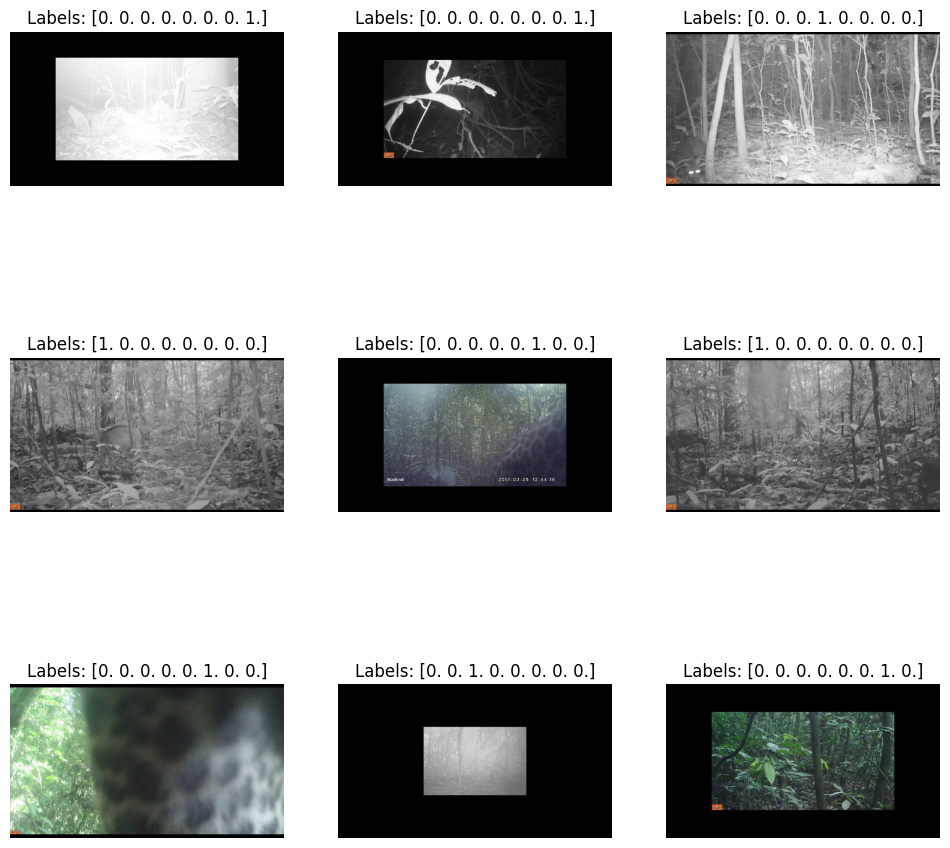

In [24]:
# Paths
dataset_folder = '../data/new_train_features'  # Path to the folder with images
labels_file = '../data/train_labels.csv'  # Path to the CSV file with labels
# Image parameters
img_width, img_height = max_sizes(dataset_folder)
#img_height = 128  # Set your image height
#img_width = 128   # Set your image width
batch_size = 32

# Load labels from CSV
df = pd.read_csv(labels_file)

frac = 0.3

df = df.sample(frac=frac, random_state=1)


# Add a full path to each image in the dataframe
df['id'] = df['id'].apply(lambda x: os.path.join(dataset_folder, x+'.jpg'))

# Perform stratified split based on the labels
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[df.columns[1:]])

# Data generator
datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]
# Create the training generator
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=None,
    x_col='id',
    y_col=train_df.columns[1:],  # All columns except 'ID' are labels
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw'
)
# Create the validation generator
val_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=None,
    x_col='id',
    y_col=val_df.columns[1:],
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='raw'
)



# Example: Display a batch of images and labels
images, labels = next(train_generator)  # Get a batch of images and labels
plt.figure(figsize=(12, 12))
for i in range(9):  # Display first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Labels: {labels[i]}")
    plt.axis('off')
plt.show()

In [25]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(df.columns) - 1, activation='sigmoid')  # Output layer for multi-label classification
])
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
# Train the model
model.fit(train_generator, validation_data=val_generator, epochs=1)#epochs=10

2024-08-27 16:06:49.787649: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-08-27 16:06:49.787668: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-08-27 16:06:49.787677: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-08-27 16:06:49.787869: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-08-27 16:06:49.788020: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-08-27 16:06:51.734644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


  1/124 [..............................] - ETA: 2:02:17 - loss: 2.0838 - accuracy: 0.0938